In [2]:
import numpy as np
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

# Seaborn for plotting and styling
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline
pylab.rcParams['figure.figsize'] = 8,6

pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
TARGET = 'label'
TARGET_2 = 'particle_type'

### Funciones:

In [5]:
def fx_distrib(base,y):
    print(
        pd.concat([
            pd.DataFrame(
                base[:][y].value_counts(dropna=False).index, columns=[y]
            ),
            pd.DataFrame(
                base[:][y].value_counts(dropna=False).values, columns=['Cantidad']
            ),
            pd.DataFrame(
                100*base[:][y].value_counts(dropna=False).values/len(base), columns=['%Total']
            )
        ], axis = 1)
    )

In [6]:
def fx_porc_missings(data, only_missings = False):
    df_vars_missings = pd.concat([pd.DataFrame(data.isnull().sum(), columns = ['n_nulos']),
           pd.DataFrame(100*data.isnull().sum()/len(data), columns = ['%Total'])], axis = 1)
    if only_missings:
        return(df_vars_missings[df_vars_missings["n_nulos"]!=0])
    else:
        return(df_vars_missings)

In [7]:
def fx_percentiles_en_lista(lista):
    vector_percentiles = [0,0.5,1,2.5,5,10,25,50,75,90,92.5,95,97.5,99,99.5,100]
    return(pd.concat([pd.DataFrame(vector_percentiles, columns = ['Percentile']),
                     pd.DataFrame(np.nanpercentile(lista, vector_percentiles), 
                                  columns = ['Valor'])], axis = 1))

In [8]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

In [9]:
# Para reducir memoria de los datasets:
def reduce_memory(ds_tmp):
    espacio_memoria_inicial = round(ds_tmp.memory_usage().sum()/(1024*1024) ,1)
    int_columns = ds_tmp.select_dtypes(include=[np.int16,np.int32,np.int64]).columns.tolist()
    for col in int_columns:
        ds_tmp[col] = pd.to_numeric(arg=ds_tmp[col], downcast='integer')

    float_columns = ds_tmp.select_dtypes(include=[np.float32, np.float64]).columns.tolist()
    for col in float_columns:
        ds_tmp[col] = pd.to_numeric(arg=ds_tmp[col], downcast='float')
    espacio_memoria_final = round(ds_tmp.memory_usage().sum()/(1024*1024),1)
    print("Antes",espacio_memoria_inicial,"MB")
    print("Ahora",espacio_memoria_final,"MB")

In [10]:
# Tiempo de Ejecución:
from time import time
time_star = time()

## code

time_end = time()
print ("Time: ", np.round((time_end-time_star)/60,2), " minutes")

Time:  0.0  minutes


In [11]:
def view_distribution(var, n_bins):
    import matplotlib.pyplot as plt
    plt.figure(1)
    plt.subplot(211)
    data_ini.loc[data_ini["train_test"]=='train',var].hist(bins = n_bins)
    plt.subplot(212)
    data_ini.loc[data_ini["train_test"]=='test',var].hist(bins = n_bins)

In [12]:
def cross_target(base,x):
    #base = base#base[base["train_test"]=='train']
    print("----------------------------------------------------------------")
    print("---- Var: ",x)
    print(pd.concat([pd.DataFrame(base[:][x].value_counts().index, columns = ['Atributo']),
           pd.DataFrame(base[:][x].value_counts().values, columns = ['Cantidad']),
           pd.DataFrame(100*base[:][x].value_counts().values/len(base), columns = ['%Total'])], axis = 1))
    
    temp = pd.DataFrame(np.array(base.groupby(x, as_index = False, axis = 0)[TARGET].mean()), 
                         columns = [x,"% ratio_conv"])
    temp["% ratio_conv"] = temp["% ratio_conv"]*100
    temp = temp.sort_values(by = ['% ratio_conv'], ascending = [False])
    print("")
    print(temp)

# 1. Carga de Datos

train_1 = pd.read_csv('../data/train_part_1.csv.gz')
train_2 = pd.read_csv('../data/train_part_2.csv.gz')

train = pd.concat([train_1,train_2])

del train_1
del train_2

In [13]:
train = pd.read_csv('../data/train_sample30.csv') # 30% de la base total de train

In [14]:
reduce_memory(train)

Antes 997.1 MB
Ahora 464.3 MB


In [15]:
train.shape

(1633711, 80)

In [16]:
train.head()

,id,ncl[0],ncl[1],ncl[2],ncl[3],avg_cs[0],avg_cs[1],avg_cs[2],avg_cs[3],ndof,...,FOI_hits_T,FOI_hits_DT,FOI_hits_S,PT,P,sWeight,particle_type,label,kinWeight,weight
0,5402123,65,4,10,16,2.86,1.50,1.60,1.44,8,...,[11 10 12 4 12 6 5 1],[-3 10 12 4 12 6 5 0],[0 1 2 3 3 3 3 3],1117.07,7552.60,0.99,0,0,6.16,6.08
1,2869431,28,8,10,10,1.89,2.38,1.10,1.30,8,...,[11 15 8 9 3],[ 0 4 0 -1 -1],[0 0 1 2 3],967.61,16366.98,0.14,1,1,1.86,0.26
2,1220399,24,7,3,3,2.17,1.71,1.00,1.00,8,...,[ 7 11 6 12 4 6],[ 1 5 0 6 -1 0],[0 0 1 1 2 3],3152.38,24894.37,1.20,1,1,1.86,2.23
3,2916886,14,3,3,4,1.57,1.33,2.00,1.25,8,...,[4 6 4 2 4],[ 0 6 1 -1 0],[0 1 1 2 3],1745.51,20235.46,1.02,1,1,3.78,3.87
4,4709800,70,16,14,18,2.86,1.62,1.50,1.78,8,...,[5 4 4 5],[ 0 0 -1 -1],[0 1 2 3],1086.92,11302.89,1.21,1,1,3.00,3.62


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633711 entries, 0 to 1633710
Data columns (total 80 columns):
id                    1633711 non-null int32
ncl[0]                1633711 non-null int16
ncl[1]                1633711 non-null int16
ncl[2]                1633711 non-null int8
ncl[3]                1633711 non-null int8
avg_cs[0]             1633711 non-null float32
avg_cs[1]             1633711 non-null float32
avg_cs[2]             1633711 non-null float32
avg_cs[3]             1633711 non-null float32
ndof                  1633711 non-null int8
MatchedHit_TYPE[0]    1633711 non-null int8
MatchedHit_TYPE[1]    1633711 non-null int8
MatchedHit_TYPE[2]    1633711 non-null int8
MatchedHit_TYPE[3]    1633711 non-null int8
MatchedHit_X[0]       1633711 non-null float32
MatchedHit_X[1]       1633711 non-null float32
MatchedHit_X[2]       1633711 non-null float32
MatchedHit_X[3]       1633711 non-null float32
MatchedHit_Y[0]       1633711 non-null float32
MatchedHit_Y[1]      

In [18]:
test = pd.read_csv('../data/test_public.csv.gz')

In [19]:
reduce_memory(test)

Antes 415.5 MB
Ahora 196.7 MB


In [20]:
test.shape

(726095, 75)

In [21]:
test.head()

,id,ncl[0],ncl[1],ncl[2],ncl[3],avg_cs[0],avg_cs[1],avg_cs[2],avg_cs[3],ndof,...,FOI_hits_Y,FOI_hits_Z,FOI_hits_DX,FOI_hits_DY,FOI_hits_DZ,FOI_hits_T,FOI_hits_DT,FOI_hits_S,PT,P
0,0,55,12,10,15,2.13,1.17,1.50,1.60,8,...,[-1849.3373 -1826.5162 -1833.7968 -1982.7971 -...,[15396.441 16315.722 16404.695 16521.16 17597...,[12.75 13.75 13.75 13.75 59. 63. ],[63.078957 68.078926 68.078926 68.078926 73.07...,[33.727364 33.74537 33.74537 33.74537 33.76...,[ 6 13 2 2 7 3],[-1 0 -2 -1 0 0],[0 1 1 1 2 3],1174.48,6884.50
1,1,43,18,12,15,2.70,1.11,1.33,1.60,8,...,[-383.5468 -222.24156 -240.82657 -240.82657 -...,[15401.72 15117.299 16321.432 16321.432 17514...,[ 6.375 6.375 6.875 82.5 29.5 29.5 31....,[126.27855 31.479162 33.979145 33.979145 ...,[33.95495 33.613575 33.622578 33.622578 33.63...,[ 6 4 5 9 12 6 3],[ 6 0 -2 9 -1 -1 0],[0 0 1 1 2 2 3],4344.64,48769.53
2,2,90,34,19,29,1.80,2.06,1.21,1.34,8,...,[-1628.1324 -1758.3168 -1887.1799 -2014.6083],[15112.236 16315.968 17508.303 18715.945],[ 25.5 27.5 118. 126. ],[126.27855 136.27849 146.27841 156.27835],[33.95495 33.99096 34.026966 34.062977],[ 3 10 7 7],[-1 0 0 0],[0 1 2 3],4109.81,20296.05
3,3,141,43,15,16,4.61,2.74,1.47,1.12,8,...,[372.85458 537.1497 483.45386 483.45386 520.7...,[15119.441 15321.034 15119.84 15119.84 16324...,[ 3.2083333 76.5 3.2083333 3.2083333 ...,[126.27855 31.479162 15.679264 15.679264 ...,[33.95495 33.613575 33.55668 33.55668 33.56...,[14 13 3 4 5 6 8 7 3],[14 13 1 2 1 0 2 7 0],[0 0 0 0 1 2 2 2 3],940.24,26062.05
4,4,22,18,8,9,1.64,2.44,1.00,1.56,8,...,[264.6528 367.2695 284.41754 305.50333 328.0...,[15203.053 16323.622 16407.324 17600.2 18808...,[ 3.2083333 82.5 3.4583333 14.833333 1...,[15.679264 33.979145 16.929256 18.179249 19.42...,[33.55668 33.622578 33.56118 33.56568 33.57...,[ 8 5 7 5 2 13 5 6],[ 1 5 0 5 2 13 5 6],[0 1 1 2 3 3 3 3],1386.38,59872.34


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726095 entries, 0 to 726094
Data columns (total 75 columns):
id                    726095 non-null int32
ncl[0]                726095 non-null int16
ncl[1]                726095 non-null int16
ncl[2]                726095 non-null int8
ncl[3]                726095 non-null int8
avg_cs[0]             726095 non-null float32
avg_cs[1]             726095 non-null float32
avg_cs[2]             726095 non-null float32
avg_cs[3]             726095 non-null float32
ndof                  726095 non-null int8
MatchedHit_TYPE[0]    726095 non-null int8
MatchedHit_TYPE[1]    726095 non-null int8
MatchedHit_TYPE[2]    726095 non-null int8
MatchedHit_TYPE[3]    726095 non-null int8
MatchedHit_X[0]       726095 non-null float32
MatchedHit_X[1]       726095 non-null float32
MatchedHit_X[2]       726095 non-null float32
MatchedHit_X[3]       726095 non-null float32
MatchedHit_Y[0]       726095 non-null float32
MatchedHit_Y[1]       726095 non-null floa

#### Seleccionar muestra del dataset

from sklearn import model_selection
train_sample, train_resto = model_selection.train_test_split(train, train_size=0.30, shuffle=True, random_state = 99)
train_sample.shape , train_resto.shape

pd.options.display.float_format = '{:.2f}'.format
train.label.mean(), train_sample.label.mean(), train_resto.label.mean()

train_sample.to_csv("../data/train_sample30.csv", index = False)

## Analisis Variable por Variable

In [23]:
def resumen_cols(list_cols,target):
    for var in list_cols:
        print(var,":",end="")
        display(train.groupby(target)[var].describe())

### Var: 'ncl[]'

In [48]:
parametro = 'ncl'
cols = [ var for var in train.columns.values if parametro in var ]
cols

['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]']

In [49]:
train[cols].head()

,ncl[0],ncl[1],ncl[2],ncl[3]
0,65,4,10,16
1,28,8,10,10
2,24,7,3,3
3,14,3,3,4
4,70,16,14,18


In [50]:
display(train[cols].describe())
display(test[cols].describe())

,ncl[0],ncl[1],ncl[2],ncl[3]
count,1633711.00,1633711.00,1633711.00,1633711.00
mean,62.77,19.53,12.44,13.01
std,32.20,12.68,7.46,6.38
min,1.00,0.00,0.00,0.00
25%,38.00,10.00,7.00,8.00
50%,58.00,17.00,11.00,12.00
75%,82.00,26.00,16.00,16.00
max,309.00,205.00,85.00,82.00


,ncl[0],ncl[1],ncl[2],ncl[3]
count,726095.00,726095.00,726095.00,726095.00
mean,62.81,19.55,12.45,13.01
std,32.26,12.68,7.45,6.38
min,2.00,0.00,0.00,0.00
25%,39.00,10.00,7.00,8.00
50%,58.00,17.00,11.00,12.00
75%,82.00,26.00,16.00,16.00
max,285.00,196.00,84.00,81.00


In [51]:
resumen_cols(list_cols = cols, target = TARGET)

ncl[0] :

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,126417.00,61.83,34.24,1.00,36.00,55.00,81.00,283.00
1,1507294.00,62.85,32.02,2.00,39.00,58.00,82.00,309.00


ncl[1] :

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,126417.00,18.64,13.66,0.00,9.00,15.00,25.00,205.00
1,1507294.00,19.61,12.59,1.00,10.00,17.00,26.00,165.00


ncl[2] :

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,126417.00,11.50,7.91,0.00,6.00,10.00,15.00,72.00
1,1507294.00,12.52,7.41,1.00,7.00,11.00,16.00,85.00


ncl[3] :

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,126417.00,11.82,6.62,0.00,7.00,10.00,15.00,79.00
1,1507294.00,13.11,6.35,0.00,9.00,12.00,16.00,82.00


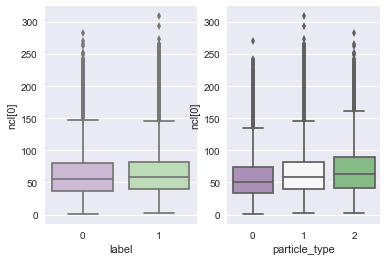

In [52]:
plt.subplot(1, 2, 1)
sns.boxplot(x=TARGET, y=cols[0], data=train, palette="PRGn")
plt.subplot(1, 2, 2)
sns.boxplot(x=TARGET_2, y=cols[0], data=train, palette="PRGn")

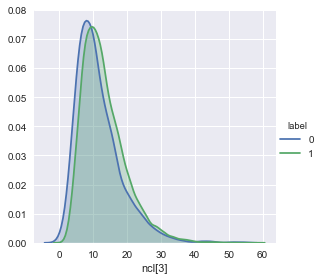

In [53]:
g = sns.FacetGrid(train.head(20000), hue=TARGET,size =4)
g.map(sns.kdeplot, cols[3], shade=True).add_legend()
sns.despine(left=True, bottom=True)
plt.show()

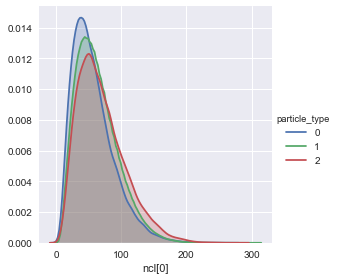

In [54]:
g = sns.FacetGrid(train, hue=TARGET_2,size =4)
g.map(sns.kdeplot, cols[0], shade=True).add_legend()
sns.despine(left=True, bottom=True)
plt.show()

In [61]:
# Creacion de nuevas variables:
train[cols].tail()

,ncl[0],ncl[1],ncl[2],ncl[3]
1633706,80,34,8,7
1633707,32,7,9,14
1633708,142,19,9,11
1633709,83,17,13,7
1633710,72,25,13,18


In [ ]:
train['ncl_0-1'] = train['ncl[0]'] - train['ncl[1]']
train['ncl_1-2'] = train['ncl[1]'] - train['ncl[2]']
train['ncl_2-3'] = train['ncl[2]'] - train['ncl[3]']

train['ncl_2-3'] = train['ncl[2]'] - train['ncl[3]']

In [60]:
a  = train['ncl[0]'].head() - train['ncl[1]'].head()
a

0    61
1    20
2    17
3    11
4    54
dtype: int16

### Var: 'avg_cs[]'

In [41]:
parametro = 'avg_cs'
cols = [ var for var in train.columns.values if parametro in var ]
cols

['avg_cs[0]', 'avg_cs[1]', 'avg_cs[2]', 'avg_cs[3]']

In [42]:
train[cols].head()

,avg_cs[0],avg_cs[1],avg_cs[2],avg_cs[3]
0,2.86,1.50,1.60,1.44
1,1.89,2.38,1.10,1.30
2,2.17,1.71,1.00,1.00
3,1.57,1.33,2.00,1.25
4,2.86,1.62,1.50,1.78


In [43]:
display(train[cols].describe())
display(test[cols].describe())

,avg_cs[0],avg_cs[1],avg_cs[2],avg_cs[3]
count,1633711.00,1633711.00,1633711.00,1633711.00
mean,2.47,2.12,1.45,1.36
std,0.66,0.78,0.37,0.43
min,1.00,0.00,0.00,0.00
25%,2.01,1.57,1.19,1.12
50%,2.39,2.00,1.38,1.29
75%,2.82,2.50,1.64,1.50
max,13.33,58.00,13.40,21.67


,avg_cs[0],avg_cs[1],avg_cs[2],avg_cs[3]
count,726095.00,726095.00,726095.00,726095.00
mean,2.47,2.12,1.45,1.36
std,0.66,0.78,0.37,0.43
min,1.00,0.00,0.00,0.00
25%,2.01,1.57,1.19,1.12
50%,2.39,2.00,1.39,1.29
75%,2.82,2.50,1.64,1.50
max,10.90,25.67,9.57,16.50


In [44]:
resumen_cols(list_cols = cols, target = TARGET)

avg_cs[0] :

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,126417.00,2.51,0.73,1.00,2.01,2.41,2.89,12.32
1,1507294.00,2.46,0.65,1.00,2.01,2.38,2.82,13.33


avg_cs[1] :

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,126417.00,2.18,0.88,0.00,1.57,2.00,2.58,13.00
1,1507294.00,2.11,0.77,1.00,1.57,2.00,2.50,58.00


avg_cs[2] :

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,126417.00,1.47,0.42,0.00,1.17,1.40,1.67,8.67
1,1507294.00,1.45,0.36,1.00,1.19,1.38,1.63,13.40


avg_cs[3] :

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,126417.00,1.37,0.49,0.00,1.12,1.28,1.50,21.67
1,1507294.00,1.36,0.42,0.00,1.12,1.29,1.50,21.00


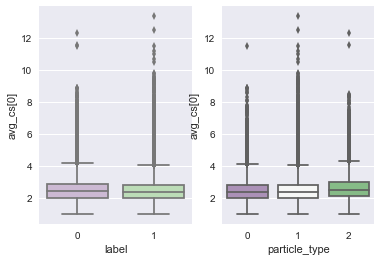

In [45]:
plt.subplot(1, 2, 1)
sns.boxplot(x=TARGET, y=cols[0], data=train, palette="PRGn")
plt.subplot(1, 2, 2)
sns.boxplot(x=TARGET_2, y=cols[0], data=train, palette="PRGn")

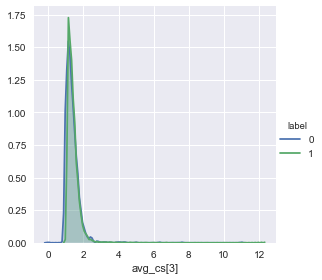

In [46]:
g = sns.FacetGrid(train.head(20000), hue=TARGET,size =4)
g.map(sns.kdeplot, cols[3], shade=True).add_legend()
sns.despine(left=True, bottom=True)
plt.show()

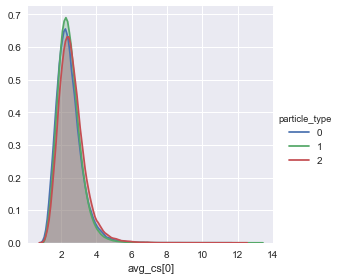

In [47]:
g = sns.FacetGrid(train, hue=TARGET_2,size =4)
g.map(sns.kdeplot, cols[0], shade=True).add_legend()
sns.despine(left=True, bottom=True)
plt.show()